# **Adult Income**

# **Table of Contents** 

1. [Problem Statement](#1)
2. [Importing libraries](#2)
3. [Reading dataset](#3)
4. [Exploring dataset](#4)
5. [Checking and Handling Missing Values](#5)
6. [Exploratory Data Analysis](#6)
7. [Data Preprocessing](#7)
8. [Correlation between Features](#8)
9. [Outlier Detection](#9)
10. [Features & Target Variables](#10)
11. [Modeling](#11)
12. [Balancing Target Column `Income`](#12)
13. [Conclusion](#13)

# **Problem Statement:** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)
>The main aim of this project is to Determine An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc........
>>The dataset contains 15 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K.
Number of other  attributes: 14
>>>In this project I want to build a model Using all Single and Ensemble Machine learning Models with maximum accuracy and minimal error .

# **Importing libraries:** <a class="anchor" id="2"></a>
[Table of Contents](#0.2)

In [1]:
#for linear algebra
import numpy as np

#for data processing
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# to hide any warnings



To hide Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Reading Dataset:** <a class="anchor" id="3"></a>
[Table of Contents](#0.3)

In [3]:
df=pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df.head(50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# **Exploring Dataset:** <a class="anchor" id="4"></a>
[Table of Contents](#0.4)

In [4]:
# to check number of rows and columns
df.shape

(48842, 15)

In [5]:
# Check columns name
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
# Show the data types of each column
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# Explore categorical and numerical columns

In [7]:
categorical_columns=[cat for cat in df.columns if df[cat].dtype=='O']
print('There are {} categorical columns'.format(len(categorical_columns)))
print(categorical_columns)

There are 9 categorical columns
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [8]:
numerical_columns=[num for num in df.columns if df[num].dtype!='O']
print('There are {} Numerical columns'.format(len(numerical_columns)))
print(numerical_columns)

There are 6 Numerical columns
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Summary of Numerical and Categorical variables:


- There are 6 numerical variables.These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.

- There are 9 Categorical variables.These are given by `Gender`,`education`, `race`, `martial_status`, `relationship`, `workclass`,`occupation`,`native-country`,`income`.


# As shown,It's noticable that there are `?` in some coulmns ,so let's explore it

In [9]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

---
# **Observation:**
>There are `?` in 3 columns which are :`work class`,`occupation`,`native-country`.
>> I will replace these `?` with null values to be able to work in dataset.
---


# Replace `?` with `Nan`

In [10]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [11]:
# Confirm that ? has been replaced
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
# Show sammry Statistical about dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# **Checking and Handling Missing Values:** <a class="anchor" id="5"></a>
[Table of Contents](#0.5)

In [13]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Visualization of Missing Values 

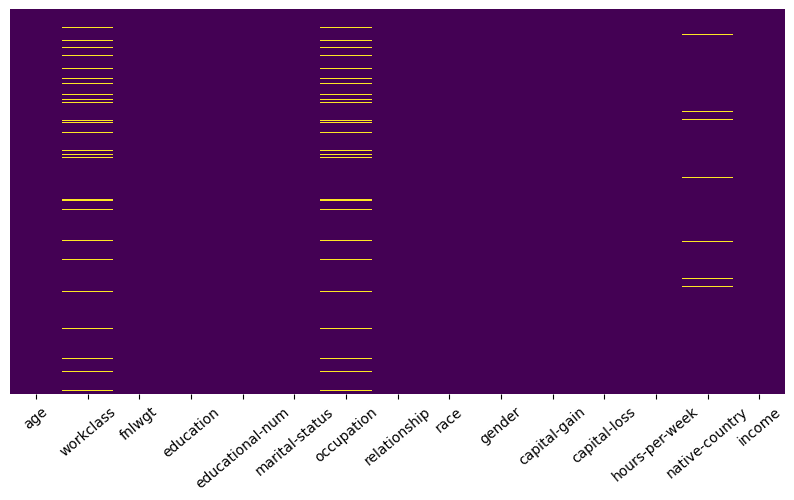

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=40)
plt.show()

Show Percentage of missing values

In [15]:
df.isnull().sum()/df.shape[0]*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

---
# **Observation**
After Showing that Percentage of missing values is very small that doesn't exceed `5%`,So no need to handle these missing values and it's better to remove them.

---

# Removing Misssing Values

In [16]:
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
# Preview that there are no null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# **Exploratory Data Analysis:** <a class="anchor" id="6"></a>
[Table of Contents](#0.6)

In [18]:
#Check for duplicated
df.duplicated().sum()

47

Remove duplicated rows

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
# Ensure that Duplicated Rows have been Removed
df.duplicated().sum()

0

Show the updated number of rows after removimg missing values and drop duplicates

In [21]:
df.shape

(45175, 15)

#  Exploring Each Column 

1.First Expole Categorical Columns

In [22]:
# Show unique  and number of labels in target column
print('There are {} unique labels'.format(df['income'].nunique()))
print(df['income'].unique())
print(df['income'].value_counts())

There are 2 unique labels
['<=50K' '>50K']
income
<=50K    33973
>50K     11202
Name: count, dtype: int64


# Visualization of  Target Column `Income`

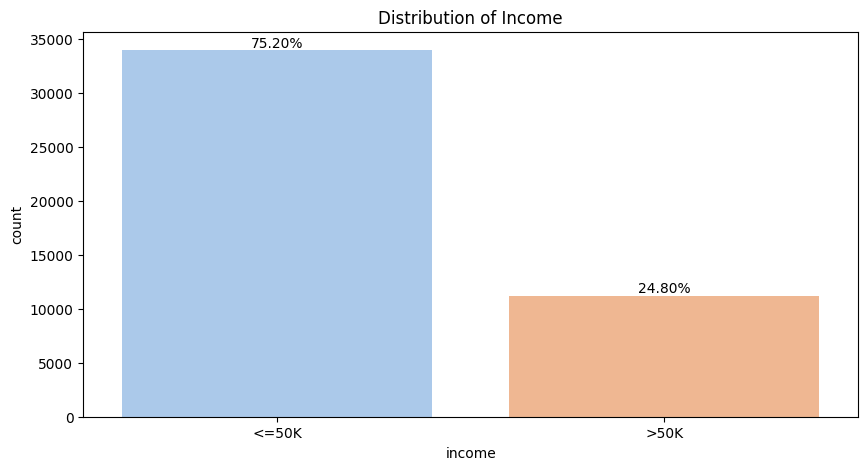

In [23]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='income',data=df,palette='pastel')
plt.title('Distribution of Income')

# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
    
    
plt.show()

---
# **Observation**
As shown target `income` column isn't balanced which will affect result and accuracy of the model.

---

In [24]:
# Show unique  and number of labels in race column
print('There are {} unique labels'.format(df['race'].nunique()))
print(df['race'].unique())
print(df['race'].value_counts())

There are 5 unique labels
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
race
White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64


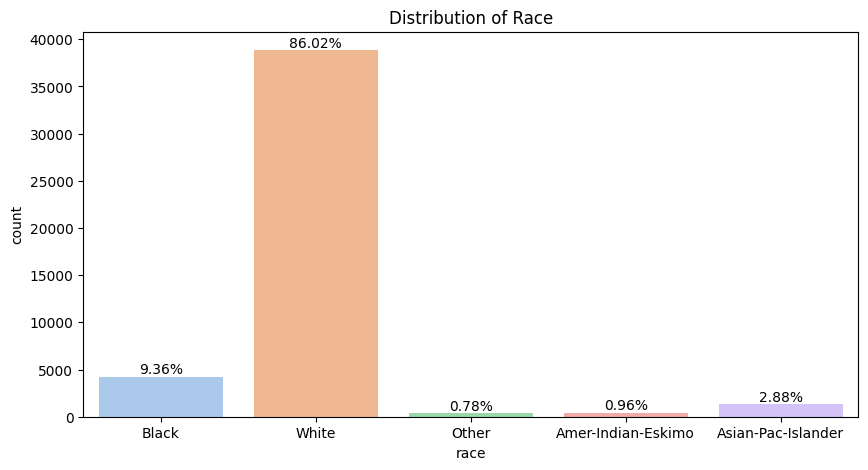

In [25]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='race',data=df,palette='pastel')
plt.title('Distribution of Race')

# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [26]:
# Show unique  and number of labels in gender column
print('There are {} unique labels'.format(df['gender'].nunique()))
print(df['gender'].unique())
print(df['gender'].value_counts())

There are 2 unique labels
['Male' 'Female']
gender
Male      30495
Female    14680
Name: count, dtype: int64


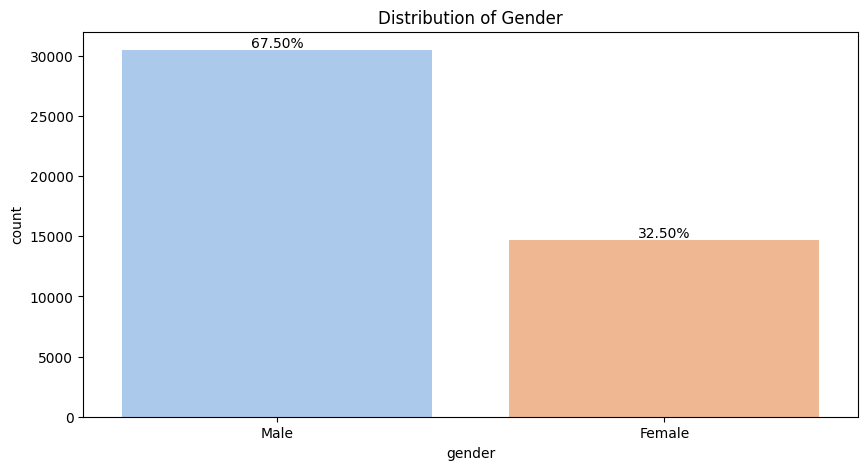

In [27]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='gender',data=df,palette='pastel')
plt.title('Distribution of Gender')

# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [28]:
# Show unique  and number of labels in occupation column
print('There are {} unique labels'.format(df['occupation'].nunique()))
print(df['occupation'].unique())
print(df['occupation'].value_counts())

There are 14 unique labels
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
occupation
Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: count, dtype: int64


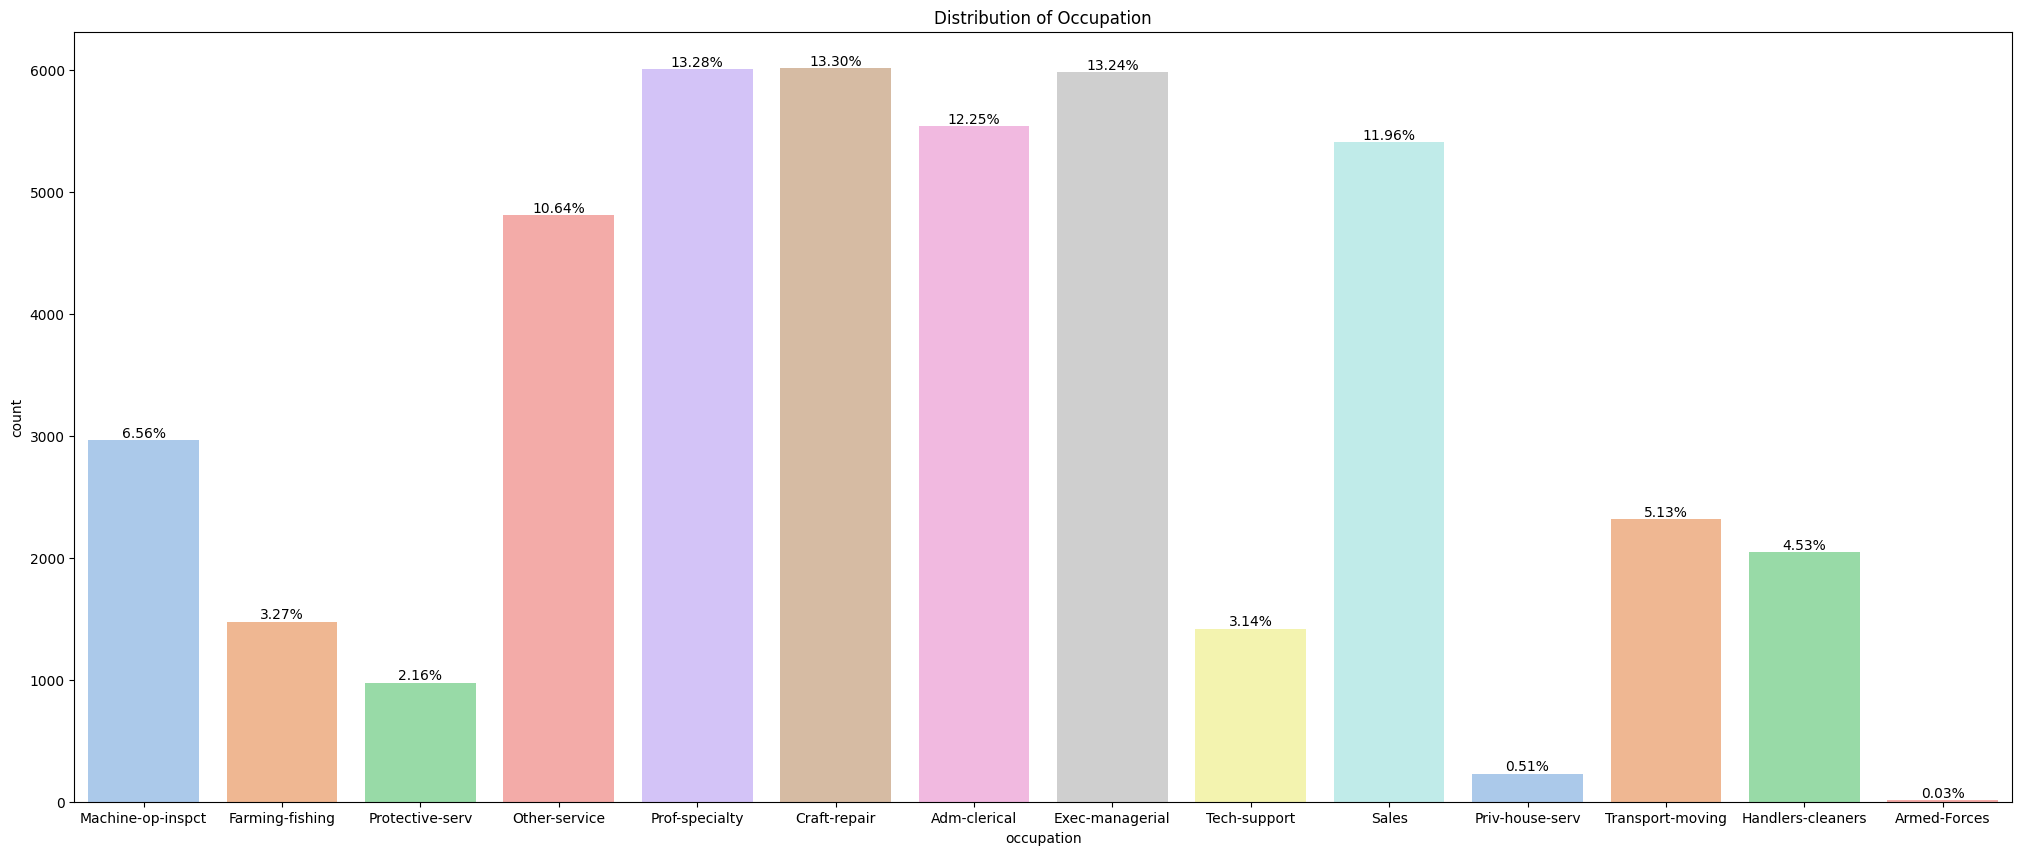

In [29]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='occupation',data=df,palette='pastel')
plt.title('Distribution of Occupation')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [30]:
# Show unique  and number of labels in relationship column
print('There are {} unique labels'.format(df['relationship'].nunique()))
print(df['relationship'].unique())
print(df['relationship'].value_counts())

There are 6 unique labels
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
relationship
Husband           18653
Not-in-family     11679
Own-child          6616
Unmarried          4787
Wife               2091
Other-relative     1349
Name: count, dtype: int64


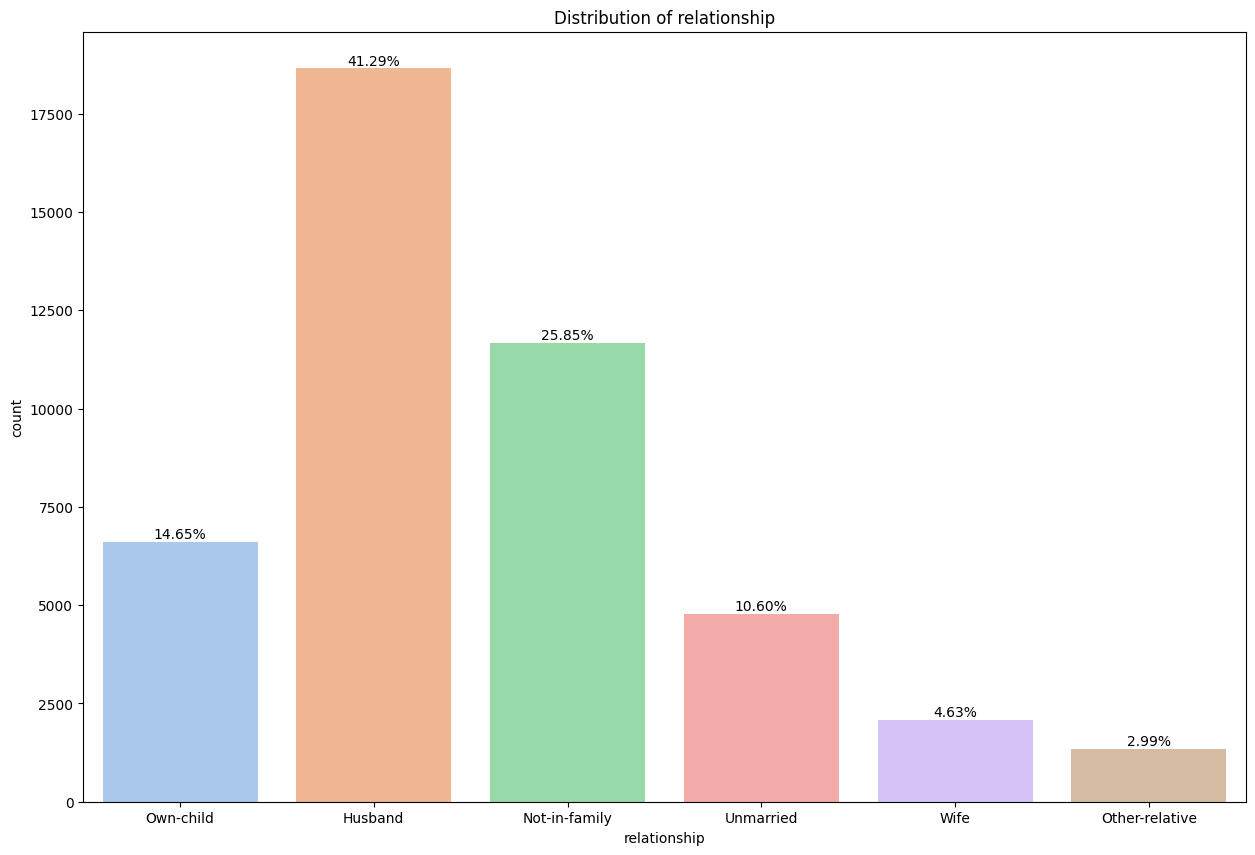

In [31]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='relationship',data=df,palette='pastel')
plt.title('Distribution of relationship')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
    

plt.show()

In [32]:
# Show unique  and number of labels in workclass column
print('There are {} unique labels'.format(df['workclass'].nunique()))
print(df['workclass'].unique())
print(df['workclass'].value_counts())

There are 7 unique labels
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64


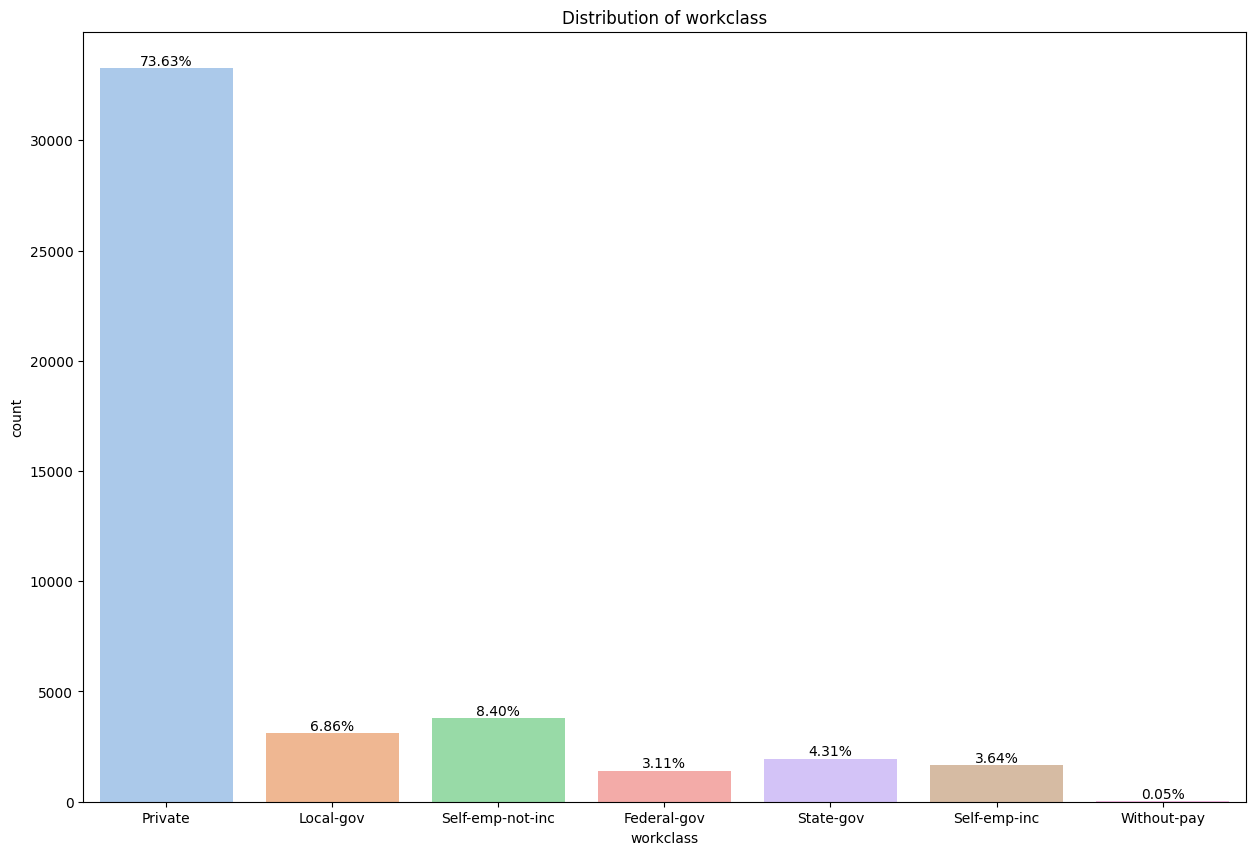

In [33]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x='workclass',data=df,palette='pastel')
plt.title('Distribution of workclass')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [34]:
# Show unique  and number of labels in education column
print('There are {} unique labels'.format(df['education'].nunique()))
print(df['education'].unique())
print(df['education'].value_counts())

There are 16 unique labels
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
education
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: count, dtype: int64


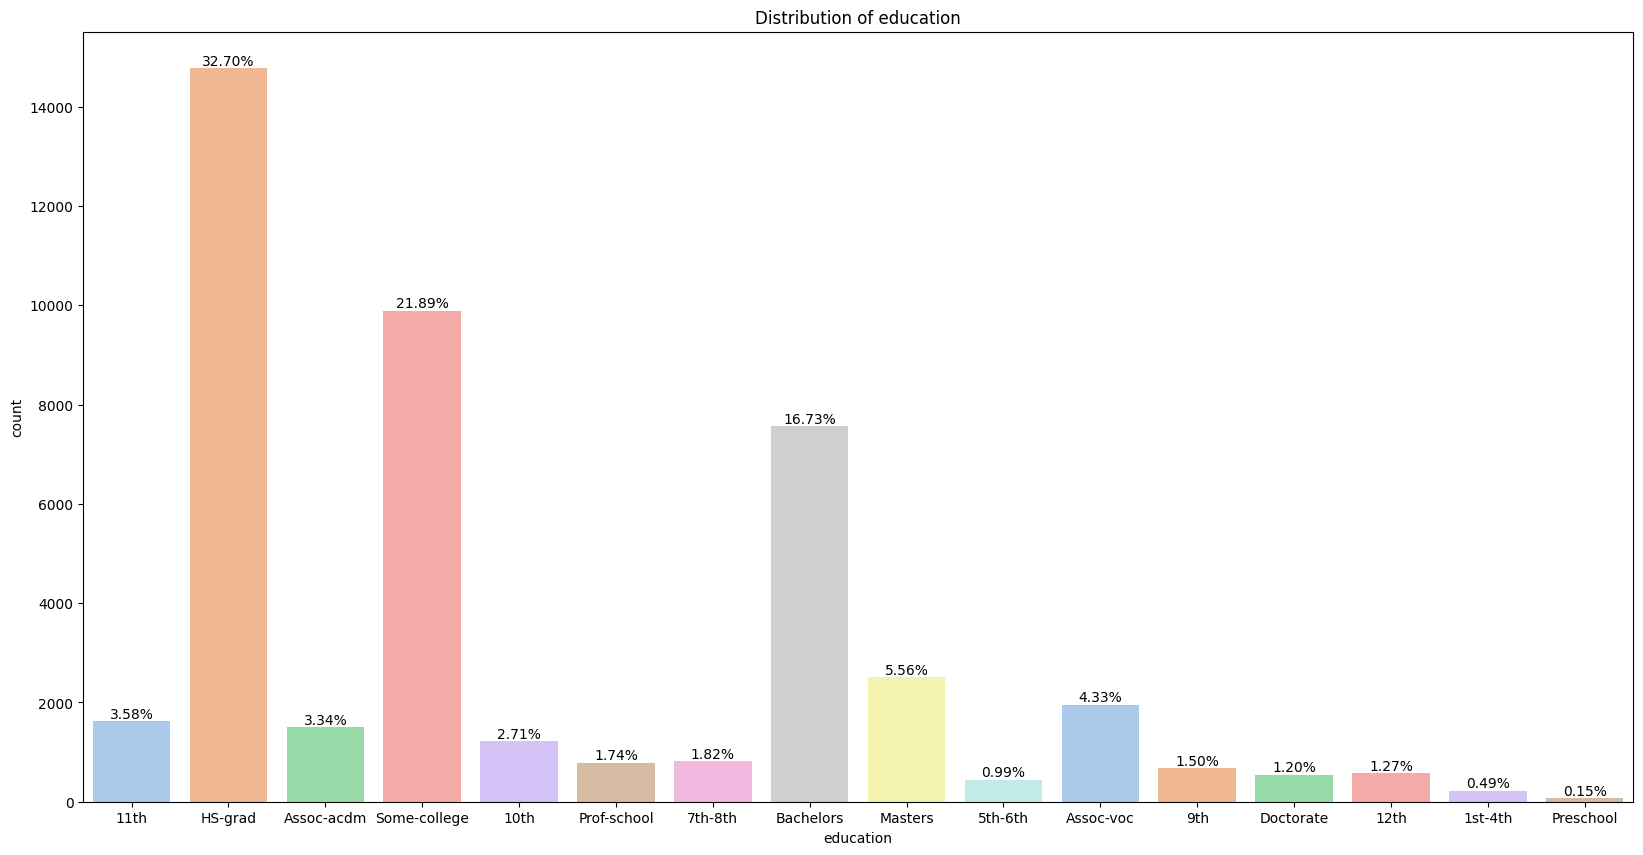

In [35]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='education',data=df,palette='pastel')
plt.title('Distribution of education')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [36]:
# Show unique  and number of labels in martial_status column
print('There are {} unique labels'.format(df['marital-status'].nunique()))
print(df['marital-status'].unique())
print(df['marital-status'].value_counts())

There are 7 unique labels
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
marital-status
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64


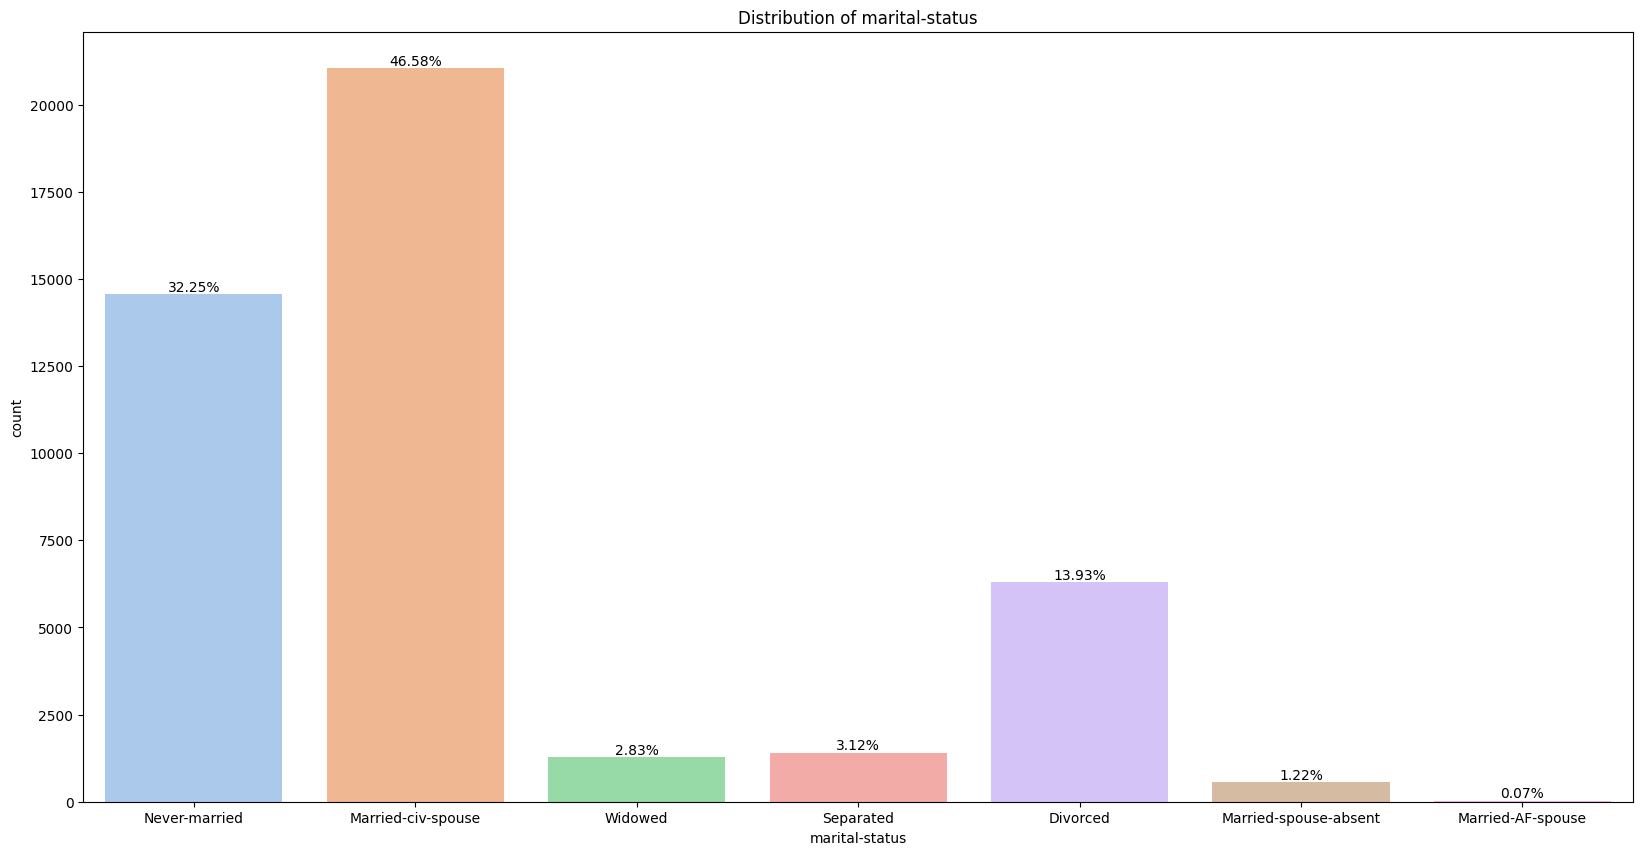

In [37]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='marital-status',data=df,palette='pastel')
plt.title('Distribution of marital-status')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [38]:
# Show unique  and number of labels in native-country column
print('There are {} unique labels'.format(df['native-country'].nunique()))
print(df['native-country'].unique())
print(df['native-country'].value_counts())

There are 41 unique labels
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
native-country
United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                    

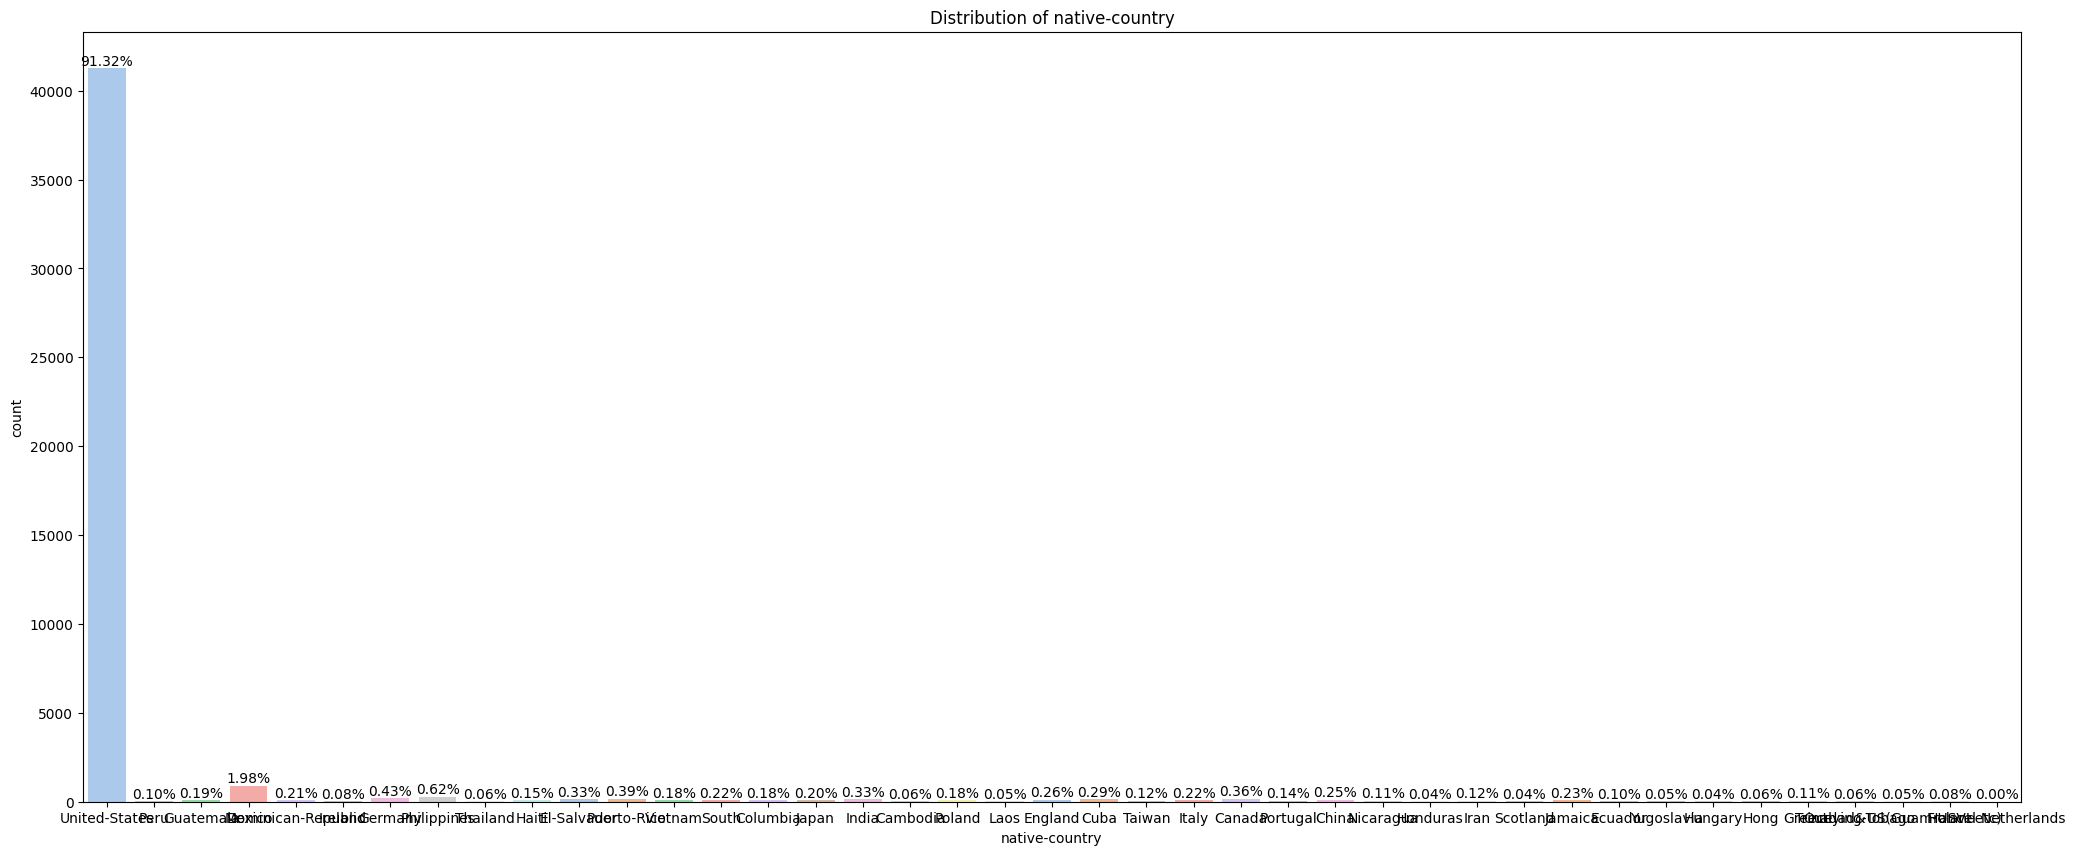

In [39]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='native-country',data=df,palette='pastel')
plt.title('Distribution of native-country')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

2. Second Explore Numerical Columns

In [40]:
# Show unique  and number of labels in age column
print('There are {} unique labels'.format(df['age'].nunique()))
print(df['age'].unique())
print(df['age'].value_counts())

There are 74 unique labels
[25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]
age
36    1283
33    1279
31    1273
35    1271
23    1237
      ... 
85       5
88       5
87       1
89       1
86       1
Name: count, Length: 74, dtype: int64


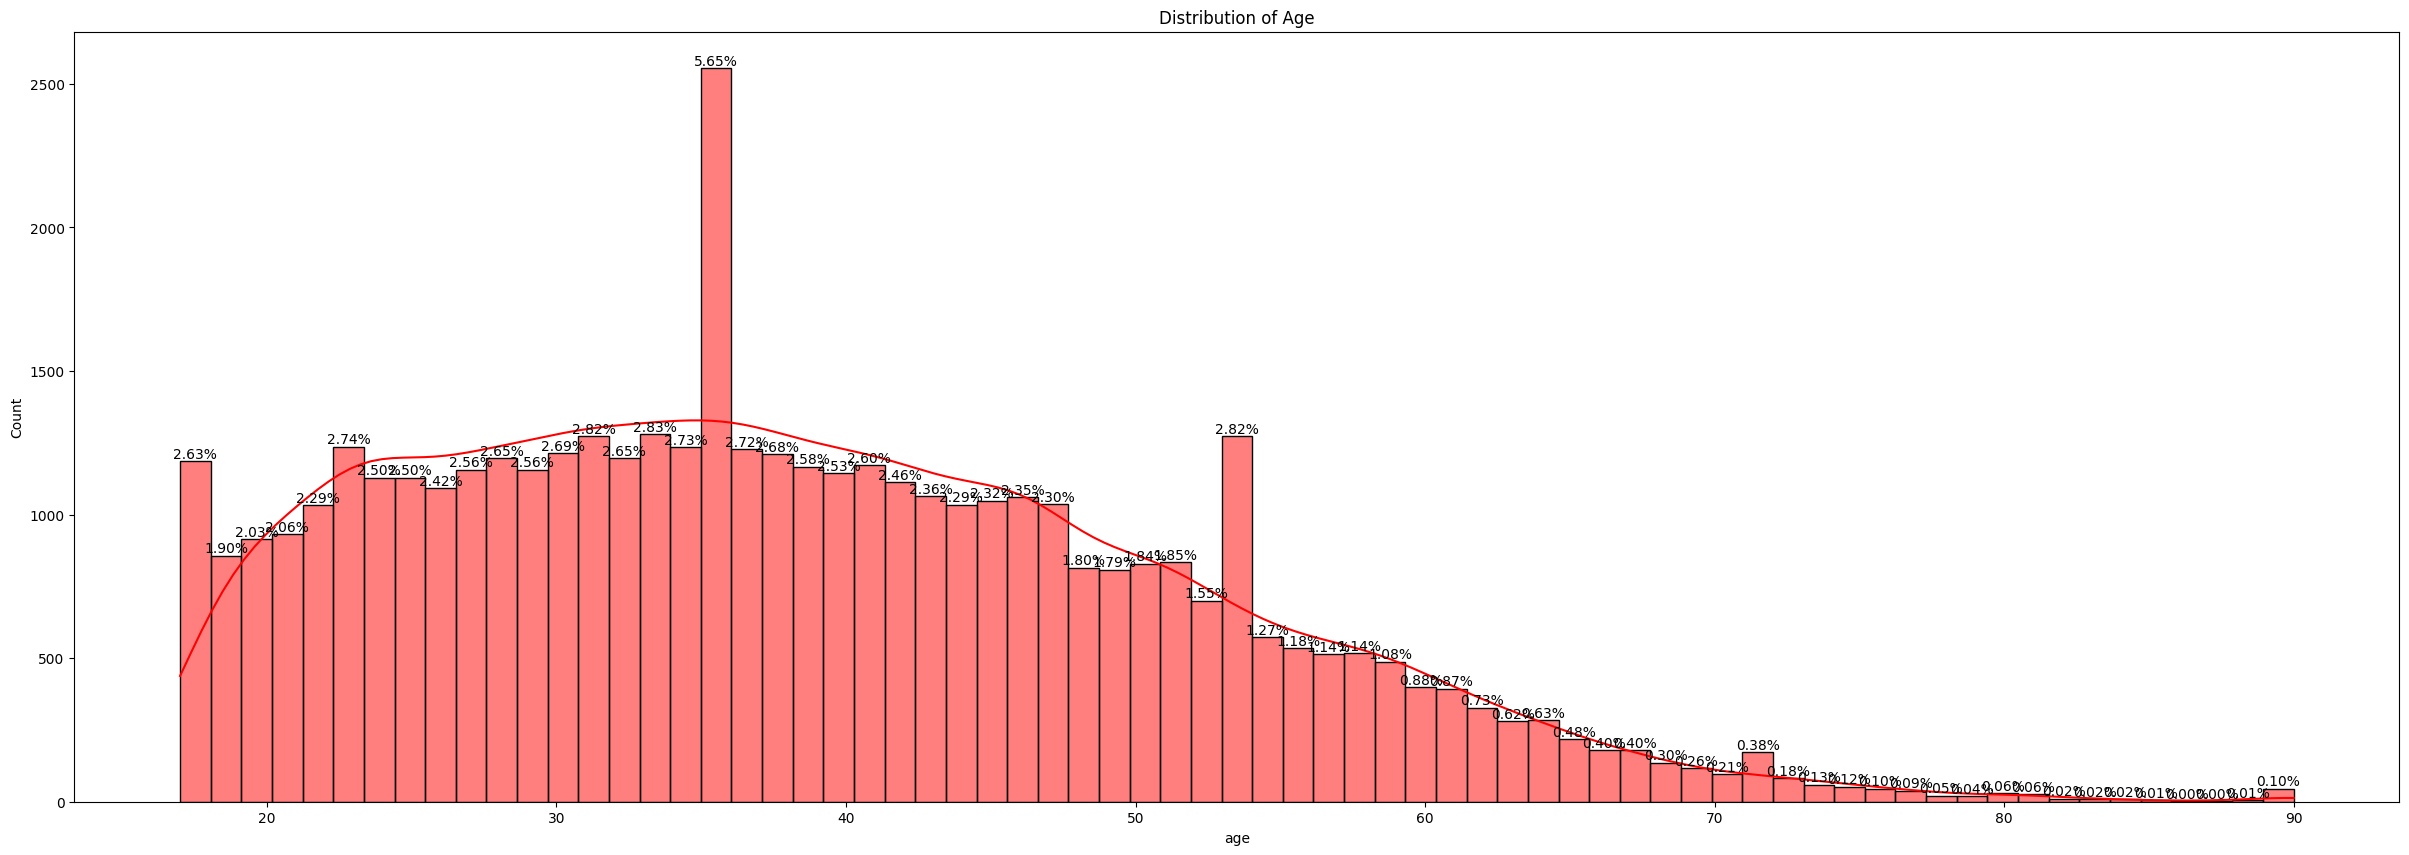

In [41]:
plt.figure(figsize=(30,10))
ax=sns.histplot(df['age'],color='r',kde=True)
plt.title('Distribution of Age')
# Calculate the total number of observations
total = len(df)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = f'{100 * height / total:.2f}%'  # Calculate percentage
    ax.annotate(percentage,                      # The text to display
                (p.get_x() + p.get_width() / 2., height),  # Position the text
                ha='center', va='bottom')        # Center it
plt.show()

In [42]:
# Show unique  and number of labels in fnlwgt column
print('There are {} unique labels'.format(df['fnlwgt'].nunique()))
print(df['fnlwgt'].unique())
print(df['fnlwgt'].value_counts())

There are 26741 unique labels
[226802  89814 336951 ... 199655 255835 257302]
fnlwgt
203488    21
120277    18
125892    18
126569    17
113364    17
          ..
238588     1
269665     1
121521     1
485710     1
160467     1
Name: count, Length: 26741, dtype: int64


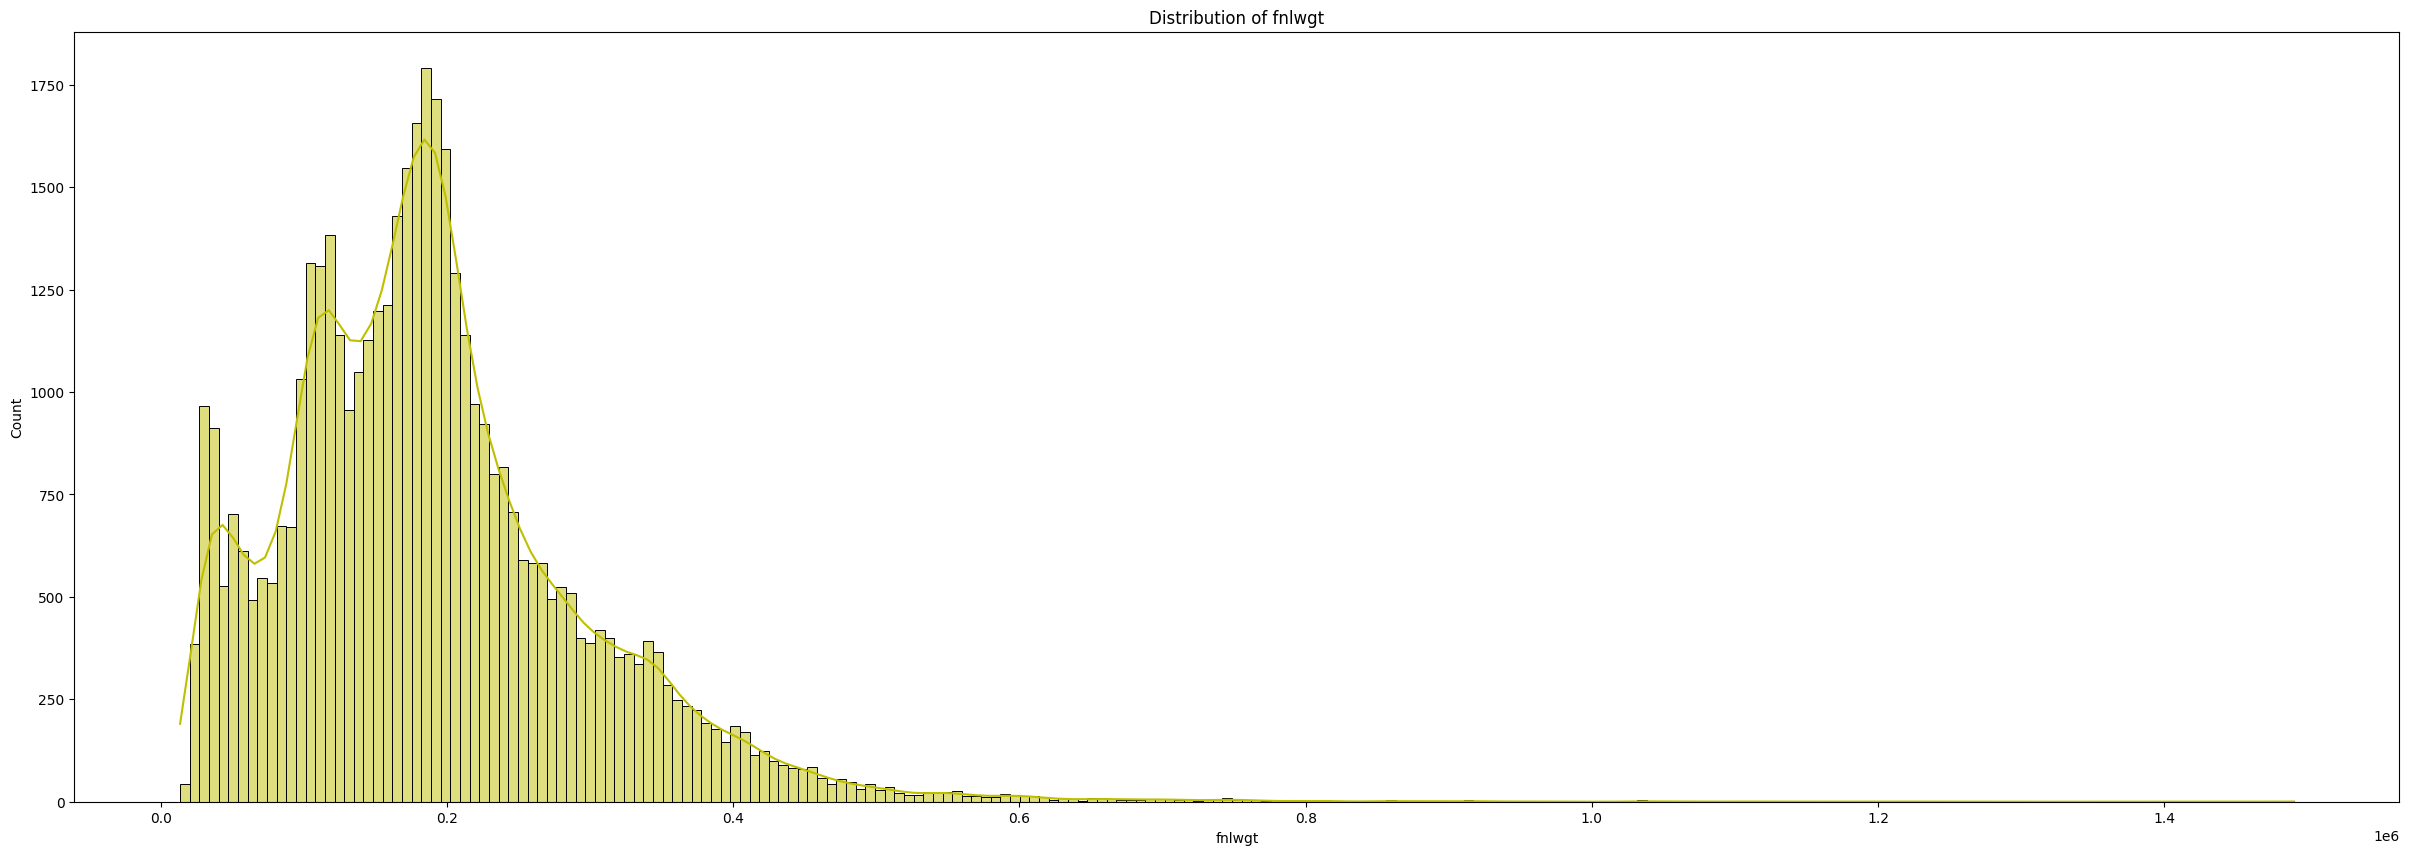

In [43]:
plt.figure(figsize=(30,10))
sns.histplot(df['fnlwgt'],color='y',kde=True)
plt.title('Distribution of fnlwgt')
plt.show()

In [44]:
# Show unique  and number of labels in educational-num column
print('There are {} unique labels'.format(df['educational-num'].nunique()))
print(df['educational-num'].unique())
print(df['educational-num'].value_counts())

There are 16 unique labels
[ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
educational-num
9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: count, dtype: int64


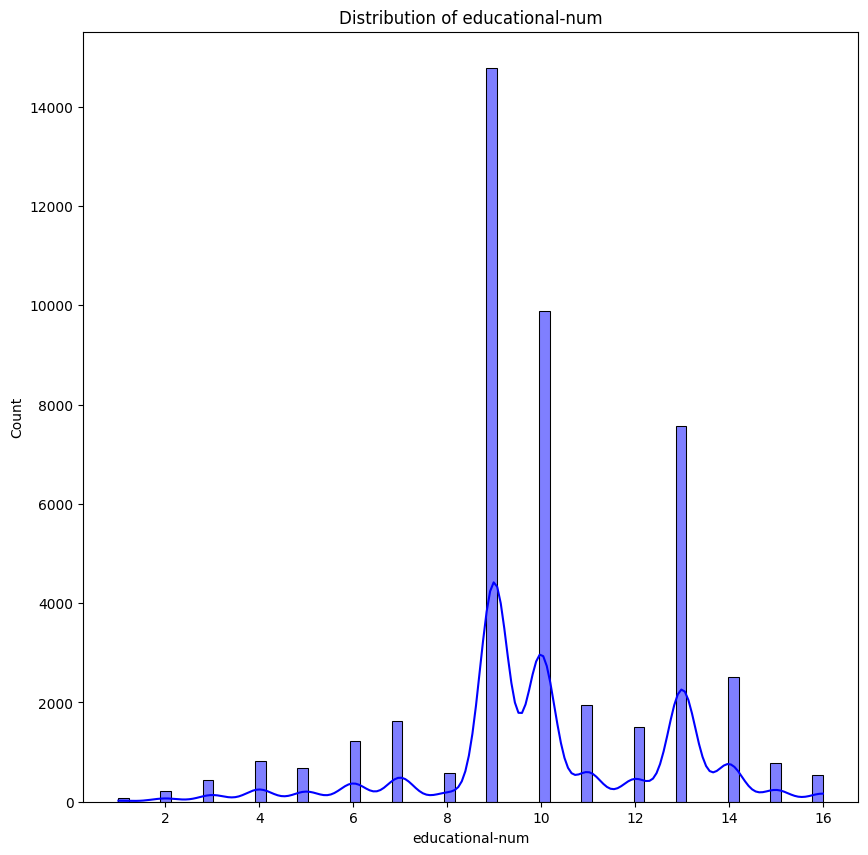

In [45]:
plt.figure(figsize=(10,10))
ax=sns.histplot(df['educational-num'],color='b',kde=True)
plt.title('Distribution of educational-num')
plt.show()

In [46]:
# Show unique  and number of labels in capital-gain column
print('There are {} unique labels'.format(df['capital-gain'].nunique()))
print(df['capital-gain'].unique())
print(df['capital-gain'].value_counts())

There are 121 unique labels
[    0  7688  3103  6418  7298  3908 14084  5178 15024  2597  2907  4650
  6497  5013 27828  4934  4064  3674  2174 10605 99999  1055   114  2580
  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471 10566
  2354  1424  1455  3325  4416 25236  4787  2829  4865  1264  1506   594
 10520  3464 20051  4101  1797  2407  3471  2653  1086  1848 14344  1151
  2993  2290 15020  9386  2202  3818  2176  5455  3418 11678  7978  7262
  6514 41310  3456  7430  2062 34095  1831  6723  5060 15831  2977  2346
  3273  2329  9562  2105  2635  2414  4931  1731  6097   914  7896  5556
  3781  3942  2538  3887  1409 25124  7443  5721   401  1173  4687  6767
   991  2036  2050  2961  2228 22040  2936  6360  2009  3432  1639 18481
  2387]
capital-gain
0        41385
15024      498
7688       391
7298       351
99999      229
         ...  
22040        1
7262         1
1639         1
1731         1
2387         1
Name: count, Length: 121, dtype: int64


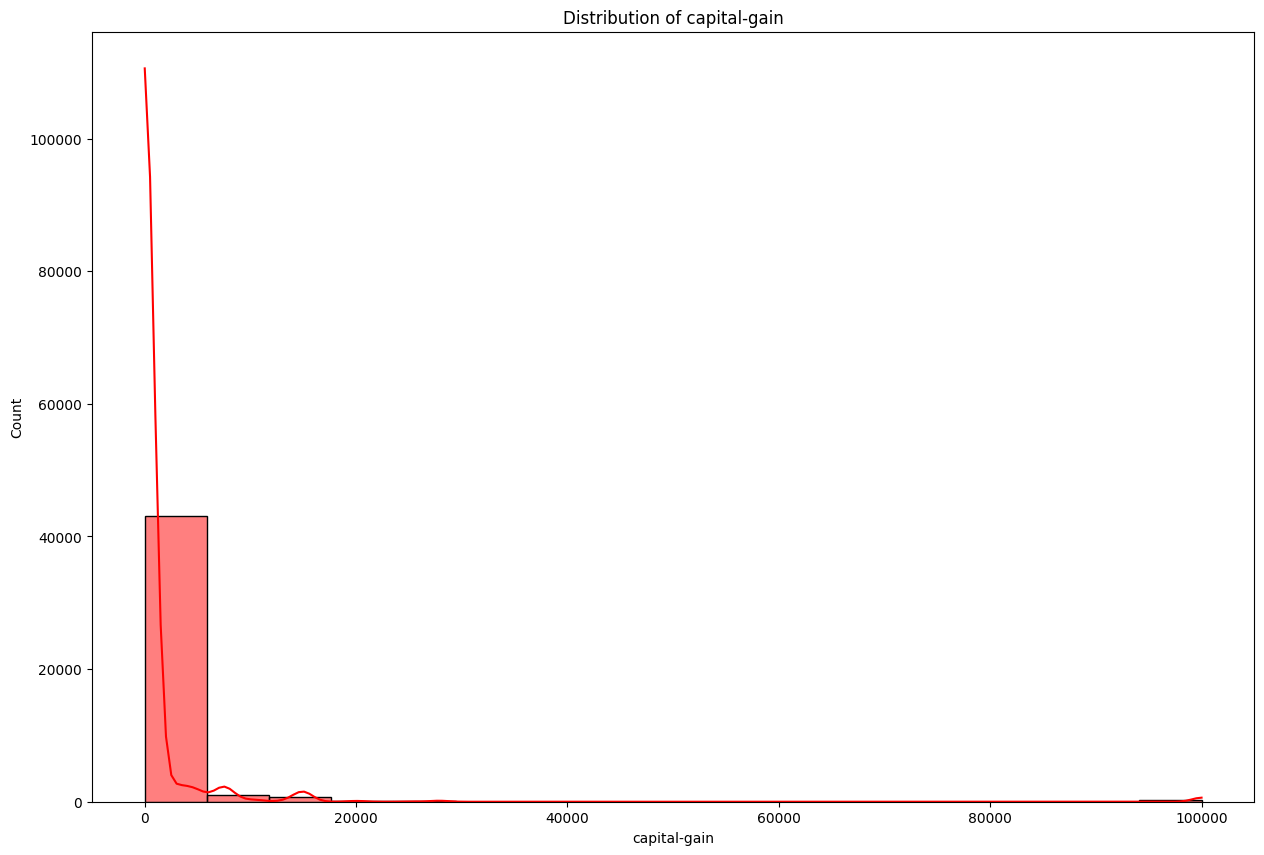

In [47]:
plt.figure(figsize=(15,10))
ax=sns.histplot(df['capital-gain'],color='r',kde=True)
plt.title('Distribution of capital-gain')

plt.show()

In [48]:
# Show unique  and number of labels in capital-loss column
print('There are {} unique labels'.format(df['capital-loss'].nunique()))
print(df['capital-loss'].unique())
print(df['capital-loss'].value_counts())

There are 97 unique labels
[   0 1721 1876 2415 1887  625 1977 2057 1429 1590 1485 2051 2377 1672
 1628 1902 1741 2444 1408 2001 2042 1740 1825 1848 1719 3004 2179 1573
 2205 1258 2339 1726 2258 1340 1504 2559 1668 1974 1980 1564 2547 2002
 1669 1617  323 1602 3175 2472 1579 2129 1735 2282 1870 1911 1092 1762
 2457 2231 2238  653 1138 2246 2603 2392 1510 1944 1380 1421 3770 1594
  213 2824 2174 1844 2149 1411 2467 2163 1651 1816 2206 2352 1539  880
  810  974 1648 1755 3683 4356 2267 2080  419  155 3900 2201 2754]
capital-loss
0       43035
1902      294
1977      246
1887      228
2415       68
        ...  
1911        1
1870        1
2163        1
2201        1
1421        1
Name: count, Length: 97, dtype: int64


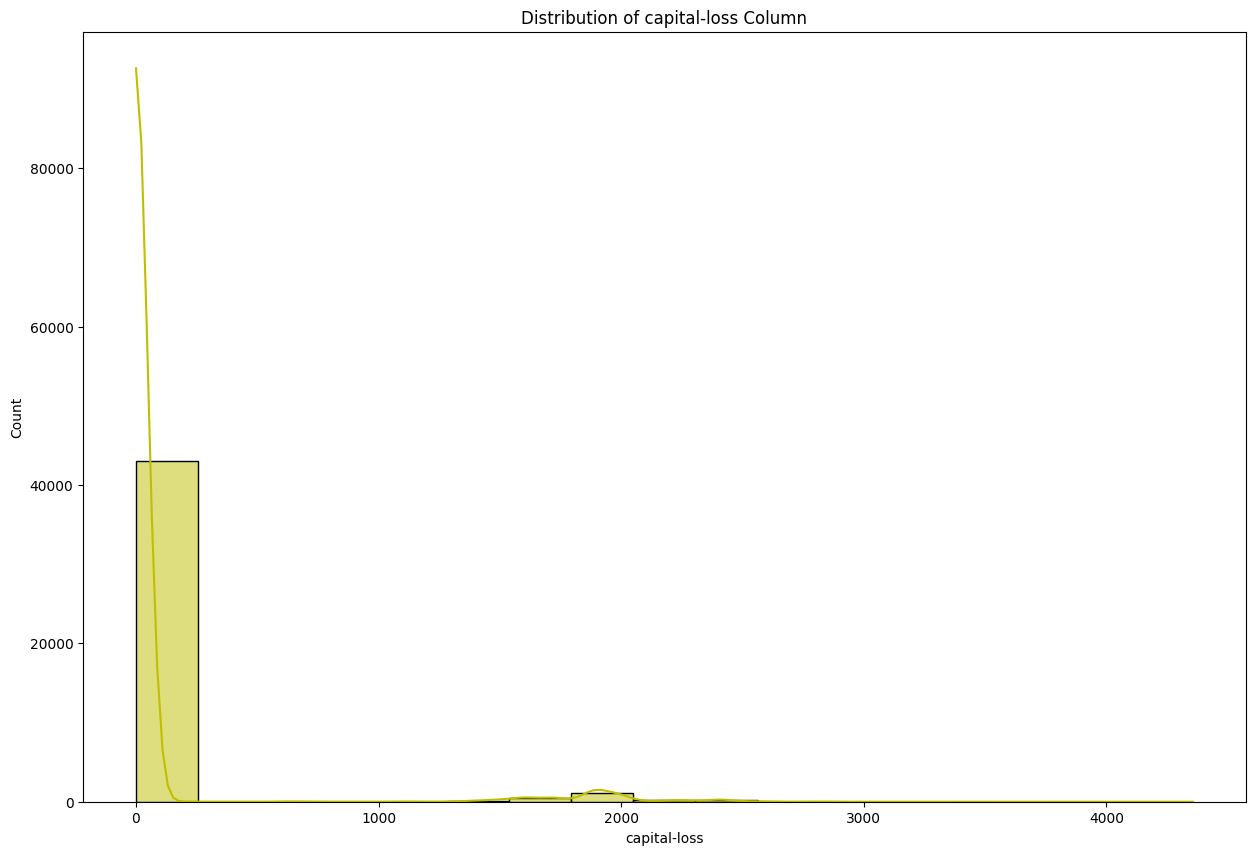

In [49]:
plt.figure(figsize=(15,10))
sns.histplot(df['capital-loss'],color='y',kde=True)
plt.title('Distribution of capital-loss Column')
plt.show()

In [50]:
# Show unique  and number of labels in hours-per-week column
print('There are {} unique labels'.format(df['hours-per-week'].nunique()))
print(df['hours-per-week'].unique())
print(df['hours-per-week'].value_counts())

There are 96 unique labels
[40 50 30 32 10 39 48 25 20 47 35 43 90 54 60 38 45 36 18 24 44 56 28 16
 41 22 55 14 33 37 12 70 15 75 52 84 42 80  8 68 99 65 17 72 53 96 21 46
  3  1 49 67 76 23  2 58 26 34  4  7 51 78 63  5 31 92 77 27 29 85  6 13
 19 98 62 66 57 86 11 59  9 64 73 61 88 79 89 74 69 87 97 94 82 91 81 95]
hours-per-week
40    21332
50     4091
45     2600
60     2085
35     1773
      ...  
87        1
94        1
82        1
69        1
79        1
Name: count, Length: 96, dtype: int64


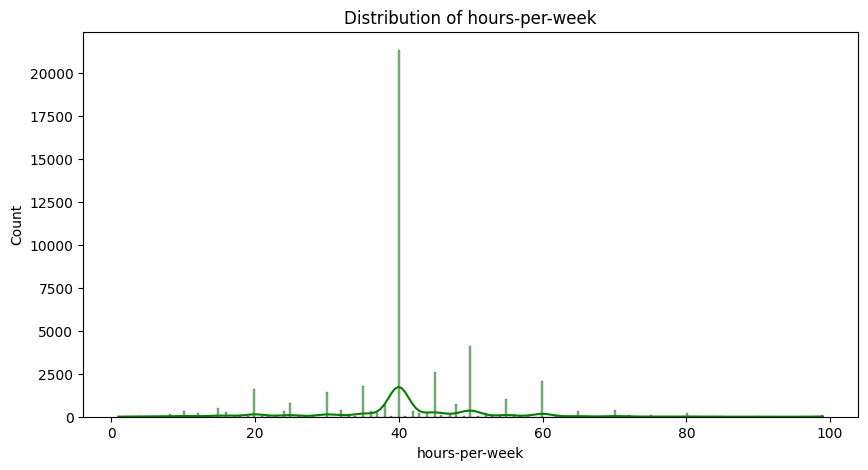

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(df['hours-per-week'],color='g',kde=True)
plt.title('Distribution of hours-per-week')
plt.show()

---
# **Obervation:**
>As we Noticed that there are `41385` Zero Values in `capital-gain` Column and `43035` Zero Values in `capital-loss` Column from overall `45175` `rows`.
>> It's better to remove these two columns `capital-gain`,`capital-loss`.
---

# **Data Preprocessing:** <a class="anchor" id="7"></a>
[Table of Contents](#0.7)

#  1. Drop 2 Columns `capital-gain`,`capital-loss`

In [52]:
df.drop(columns=['capital-gain','capital-loss'],inplace=True)

In [53]:
# Check that 2 columns are removed
print(df.shape)
df.columns

(45175, 13)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

# 2. Apply Label Enoding in Categorical Variables

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label_encoder=LabelEncoder()
df['workclass']=label_encoder.fit_transform(df['workclass'])
df['occupation']=label_encoder.fit_transform(df['occupation'])
df['race']=label_encoder.fit_transform(df['race'])
df['relationship']=label_encoder.fit_transform(df['relationship'])
df['gender']=label_encoder.fit_transform(df['gender'])
df['marital-status']=label_encoder.fit_transform(df['marital-status'])
df['education']=label_encoder.fit_transform(df['education'])
df['native-country']=label_encoder.fit_transform(df['native-country'])
df['income']=label_encoder.fit_transform(df['income'])

In [56]:
# Check after label Encoding
print(df.dtypes)


age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
gender             int64
hours-per-week     int64
native-country     int64
income             int64
dtype: object


# **Correlation between Features:** <a class="anchor" id="8"></a>
[Table of Contents](#0.8)

In [57]:
cor=df.corr().T
cor

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
age,1.000000,0.085825,-0.075590,-0.003706,0.037269,-0.271265,-0.004511,-0.247572,0.024179,0.081920,0.101604,-0.003645,0.236839
workclass,0.085825,1.000000,-0.034972,0.017858,0.040771,-0.033152,0.017528,-0.065081,0.049799,0.069634,0.051378,0.003804,0.015644
fnlwgt,-0.075590,-0.034972,1.000000,-0.025239,-0.041992,0.033029,-0.002184,0.009828,-0.029282,0.027374,-0.018712,-0.060849,-0.007227
education,-0.003706,0.017858,-0.025239,1.000000,0.347561,-0.041477,-0.033547,-0.013249,0.011630,-0.027655,0.061125,0.077491,0.081178
educational-num,0.037269,0.040771,-0.041992,0.347561,1.000000,-0.064822,0.089713,-0.088604,0.031784,0.003455,0.146463,0.092158,0.332981
marital-status,-0.271265,-0.033152,0.033029,-0.041477,-0.064822,1.000000,0.016346,0.180410,-0.070318,-0.119996,-0.183007,-0.022291,-0.192499
occupation,-0.004511,0.017528,-0.002184,-0.033547,0.089713,0.016346,1.000000,-0.051718,0.000037,0.056853,0.016311,-0.002885,0.049752
relationship,-0.247572,-0.065081,0.009828,-0.013249,-0.088604,0.180410,-0.051718,1.000000,-0.118496,-0.583139,-0.259112,-0.007231,-0.253362
race,0.024179,0.049799,-0.029282,0.011630,0.031784,-0.070318,0.000037,-0.118496,1.000000,0.089154,0.044826,0.124537,0.070883
gender,0.081920,0.069634,0.027374,-0.027655,0.003455,-0.119996,0.056853,-0.583139,0.089154,1.000000,0.231392,-0.004267,0.215741


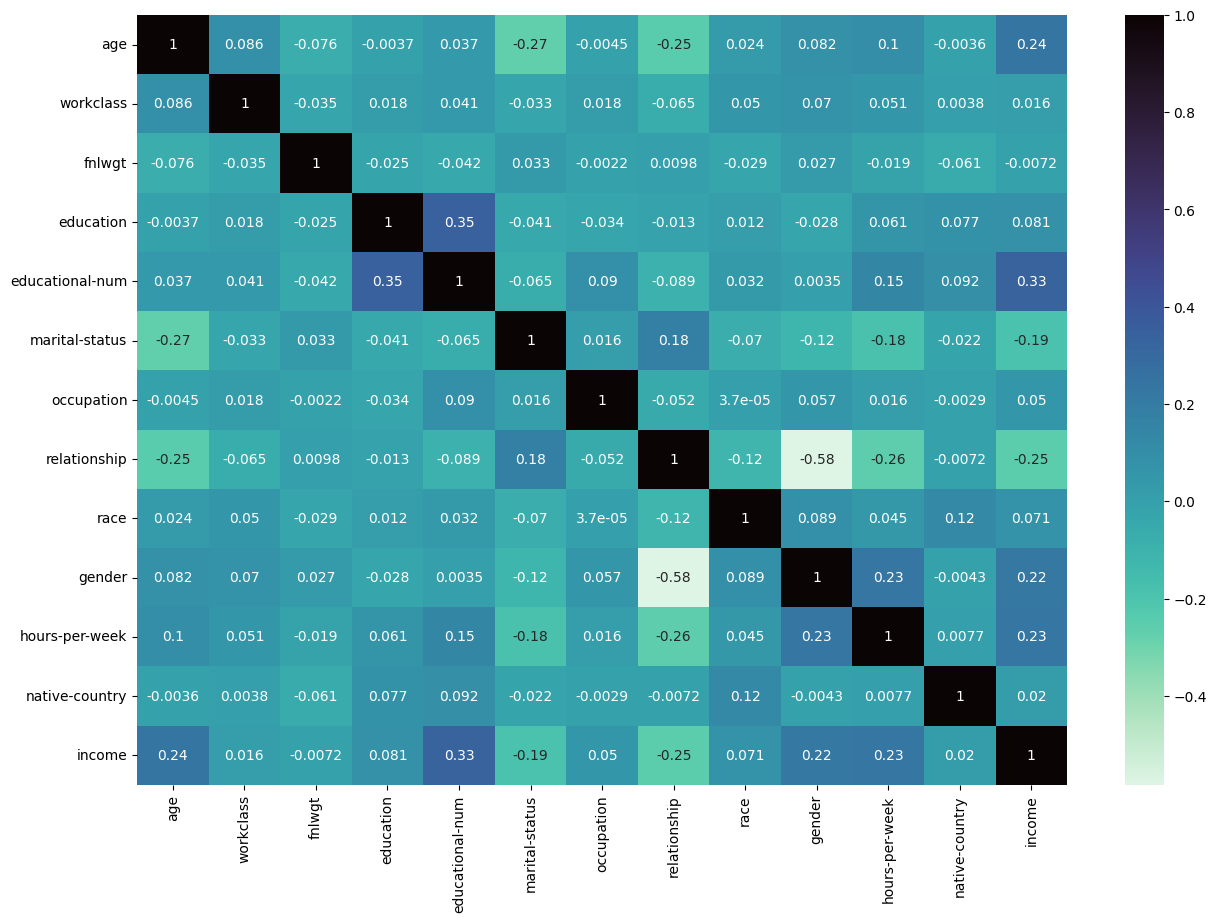

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,cmap='mako_r',annot=True)
plt.show()


# **Outlier Detection:** <a class="anchor" id="9"></a>
[Table of Contents](#0.9)

<Axes: >

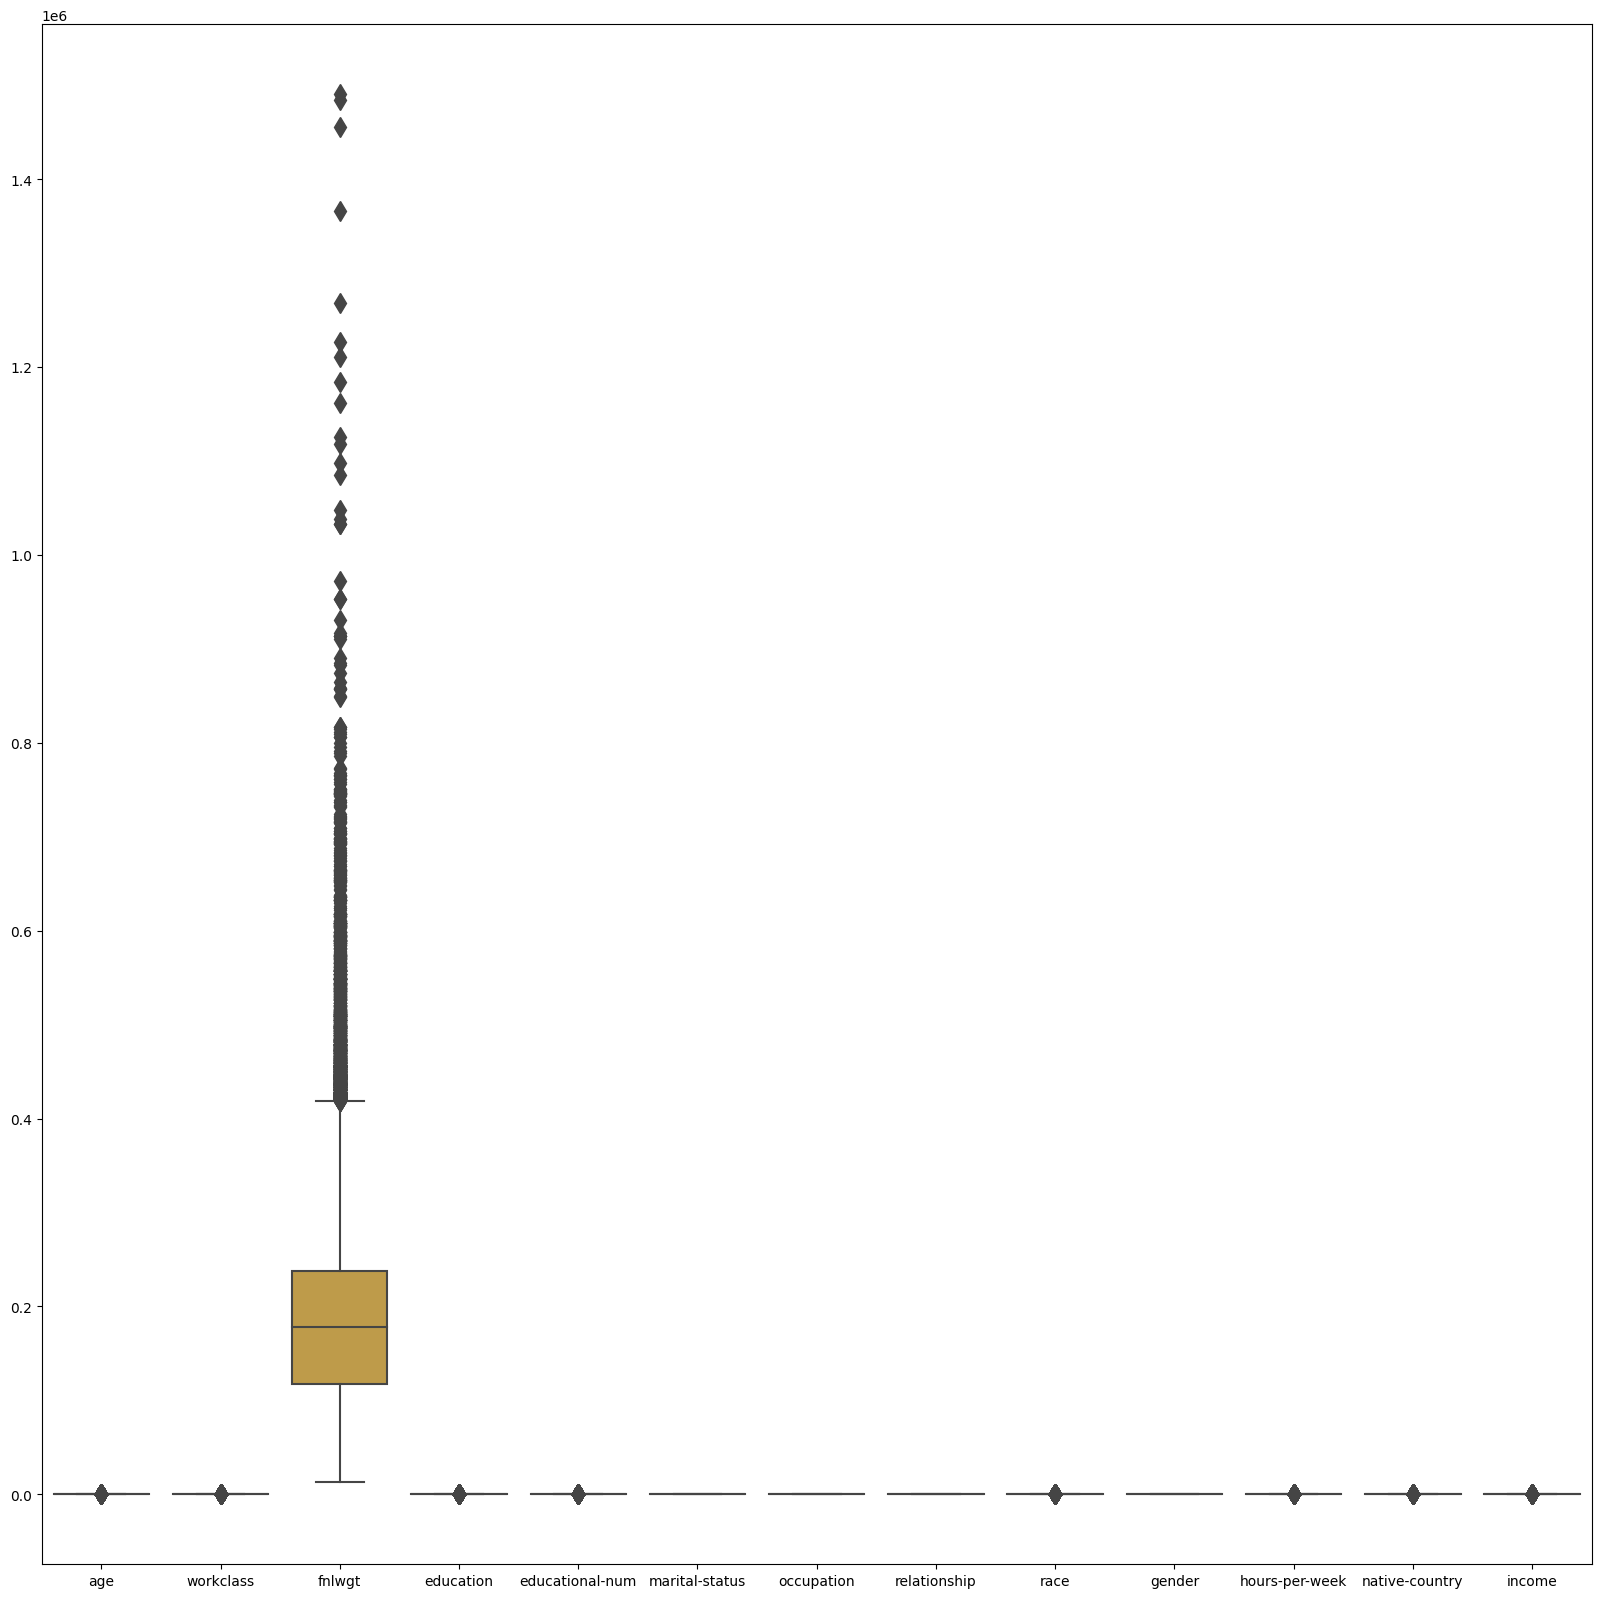

In [67]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df,fliersize=10)

# **Features & Target Variables:** <a class="anchor" id="10"></a>
[Table of Contents](#0.10)

In [59]:
x=df.drop(columns='income',axis=1)
y=df['income']

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31622, 12)
y_train shape: (31622,)
X_test shape: (13553, 12)
y_test shape: (13553,)


# **Modeling** <a class="anchor" id="11"></a>
[Table of Contents](#0.11)

In [107]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix

1. First train model using `Logistic Regression` ,`SVC` ,`Random Forest` to test accuracy without any feature scaling 

In [85]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print("Accuracy using LogisticRegression is : ", accuracy_score(y_predict,y_test))

Accuracy using LogisticRegression is :  0.8005607614550284


In [86]:
svc=SVC()
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
print("Accuracy using SVC is : ",accuracy_score(y_predict,y_test))

Accuracy using SVC is :  0.820777687596842


In [87]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)
print("Accuracy using Random Forest is : ",accuracy_score(y_predict,y_test))

Accuracy using Random Forest is :  0.824097985685826


2. Second apply 3 Feature Scaling Techniques: `MinMaxScaler`,`StandardScaler`,`RobustScaler` and test accuracy after apply each technique using `Random Forest` Model.

In [76]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [73]:
# Scaling X_train using Min Max Scaler to be between 0,1
scaler=MinMaxScaler()
mm_xtrain=scaler.fit_transform(X_train)
mm_Xtest=scaler.fit_transform(X_test)

In [89]:
rf=RandomForestClassifier()
rf.fit(mm_xtrain,y_train)
y_predict=rf.predict(mm_Xtest)
print("Accuracy by Random Forest using Min Max Scaler : ",accuracy_score(y_predict,y_test))

Accuracy by Random Forest using Min Max Scaler :  0.8273444993728326


In [79]:
# Scaling X_train using Standard Scaler to be between -3,3
scaler=StandardScaler()
standard_xtrain=scaler.fit_transform(X_train)
standard_Xtest=scaler.fit_transform(X_test)

In [91]:
rf=RandomForestClassifier()
rf.fit(standard_xtrain,y_train)
y_predict=rf.predict(standard_Xtest)
print("Accuracy by Random Forest using Standard Scaler : ",accuracy_score(y_predict,y_test))

Accuracy by Random Forest using Standard Scaler :  0.825499889323397


In [82]:
# Scaling X_train using Robust Scaler to 
scaler=RobustScaler()
robust_xtrain=scaler.fit_transform(X_train)
robust_Xtest=scaler.fit_transform(X_test)

In [92]:
rf=RandomForestClassifier()
rf.fit(robust_xtrain,y_train)
y_predict=rf.predict(robust_Xtest
print("Accuracy by Random Forest using Robust Scaler : ",accuracy_score(y_predict,y_test))

Accuracy by Random Forest using Robust Scaler :  0.8229912196561647


---
# **Observation:**
> After Applying 3 Feature Scaling Techniques : It's noticable that `Min Max Scaler` is the best fitting technique as it has increased accuracy by `0.3 %`  using `Random Forest` .
>>  SO I  will scale features using `Min Max Scaler`.

# **Balancing Target Column `Income` :** <a class="anchor" id="12"></a>
[Table of Contents](#0.12)

In [93]:
# balancing using SMOTE techniue after applying min max scaler 
from imblearn.over_sampling import SMOTE

In [120]:
smote=SMOTE(random_state=0)
x_train_balanced,y_train_balanced=smote.fit_resample(mm_xtrain,y_train)
print("Original target class distribution:")
print(y_train.value_counts())

print("Balanced target class distribution:")
print(y_train_balanced.value_counts())

Original target class distribution:
income
0    23781
1     7841
Name: count, dtype: int64
Balanced target class distribution:
income
1    23781
0    23781
Name: count, dtype: int64


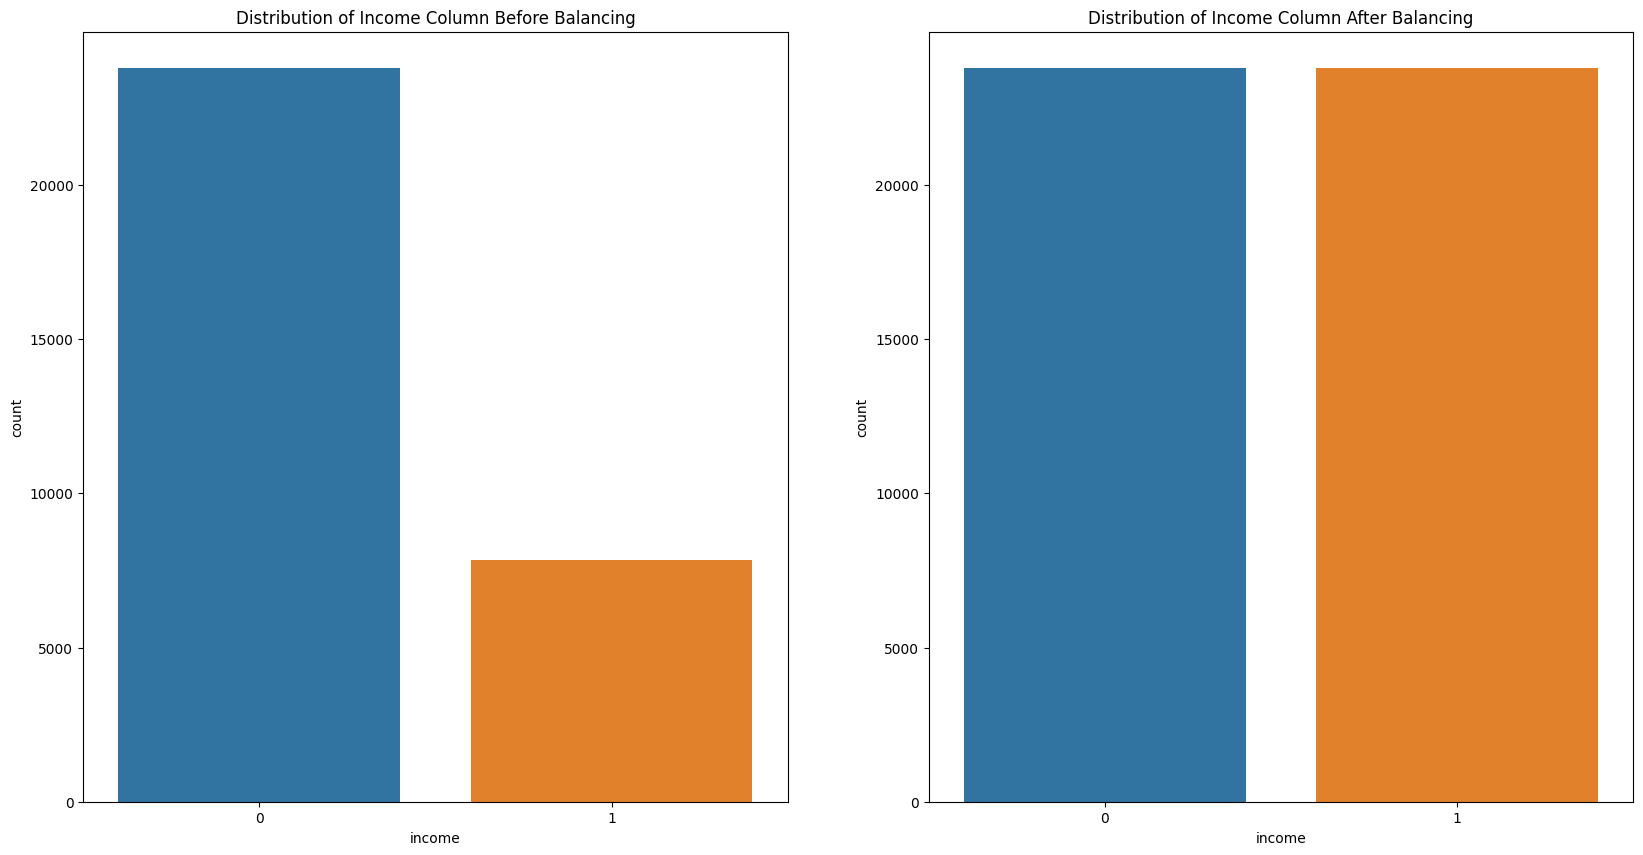

In [121]:
# Show Distribution before and after Balancing 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Distribution of Income Column Before Balancing")
plt.subplot(1,2,2)
sns.countplot(x=y_train_balanced)
plt.title("Distribution of Income Column After Balancing")
plt.show()

In [122]:
# split after balancing
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(x_train_balanced, y_train_balanced, test_size=0.3, random_state=0)



# Check Testing Accuracy using `Random Forest` ,`SVC` ,`Logistic Regression` after `Balancing Income Column` 

In [123]:
rf=RandomForestClassifier()
rf.fit(X_train_bal,y_train_bal)
y_predict=rf.predict(X_test_bal)
print("Accuracy by Random Forest After Balancing : ",accuracy_score(y_predict,y_test_bal))

Accuracy by Random Forest After Balancing :  0.866003223771813


In [124]:
lr=LogisticRegression()
lr.fit(X_train_bal,y_train_bal)
y_predict=lr.predict(X_test_bal)
print("Accuracy by Logistic Regression After Balancing : ",accuracy_score(y_predict,y_test_bal))

Accuracy by Logistic Regression After Balancing :  0.745462190763193


In [125]:
svc=SVC()
svc.fit(X_train_bal,y_train_bal)
y_predict=svc.predict(X_test_bal)
print("Accuracy by SVC After Balancing : ",accuracy_score(y_predict,y_test_bal))

Accuracy by SVC After Balancing :  0.7978134417268203


---
# **Observation:**
>Accuracy of `Random Forest` has increased after Balancing by almost `4 %` from `0.824097985685826` to `0.866003223771813`
>> Accuracy of both `Logistic Regression `  and `SVC `has decreased noticeably after Balancing :
    >>>AS `Logistic Reression` has decresed from `0.8005607614550284` to `0.745462190763193` which is `6 %`.
    >>>>AS `SVC` has decresed from `0.8207776875968424` to `0.7978134417268203` which is almost `2 %`.
    
---


# Building almost all  single and ensemble Machine Learning Models with Hyperparameter Tunning with `Min Max Scaler` and `Balancing Income Column` 

In [126]:
# Single Models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.001,0.1, 1, 10]},
    'KNN': {'n_neighbors': [1,3, 5, 7]},
    'Naive Bayes': {}, # Add an empty dictionary for Naive Bayes since it doesn't usually require hyperparameter tuning
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [5,10, 20, 30]},
    'AdaBoost': {'n_estimators': [10,50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_bal, y_train_bal)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train_bal, y_train_bal)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test_bal)
    accuracy = accuracy_score(y_test_bal, y_pred)
    report = classification_report(y_test_bal, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


Logistic Regression: Best Parameters - {'C': 0.1}, Best Score - 0.7484456268595938
KNN: Best Parameters - {'n_neighbors': 1}, Best Score - 0.8538429527389961
Naive Bayes: Best Parameters - {}, Best Score - 0.7561948583917466
SVM: Best Parameters - {'C': 1, 'kernel': 'linear'}, Best Score - 0.7515693858992212
Decision Tree: Best Parameters - {'max_depth': 10}, Best Score - 0.8226953125863442
Random Forest: Best Parameters - {'n_estimators': 200}, Best Score - 0.868891276635298
Extra Trees: Best Parameters - {'n_estimators': 200}, Best Score - 0.8730061845077982
Bagging: Best Parameters - {'n_estimators': 30}, Best Score - 0.861051639243947
AdaBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.8432402504694757
Gradient Boosting: Best Parameters - {'n_estimators': 200}, Best Score - 0.8570270018992854
--- Logistic Regression ---
Accuracy: 0.7458126007428691
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74

Show Confusion matrix of the best model `Extra Trees`

Accuracy of Extra Trees :  0.876024949190553


<Axes: >

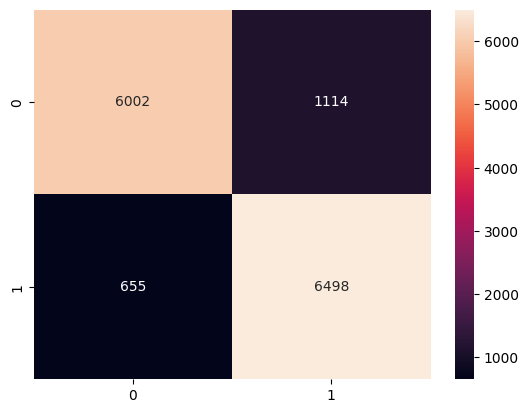

In [130]:
et=ExtraTreesClassifier(n_estimators=200)
et.fit(X_train_bal, y_train_bal)
y_pred=et.predict(X_test_bal)
print("Accuracy of Extra Trees : ",accuracy_score(y_test_bal,y_pred))
cm=confusion_matrix(y_test_bal,y_pred)
sns.heatmap(cm,annot=True,fmt='.4g')


# **Conclusion:** <a class="anchor" id="13"></a>
[Table of Contents](#0.13)
>The best models that achieve highest accuracy comparing to others after performing `Balancing` and ` Hyperparmeter Tunning using Grid Search` are : `Random Forest` and `Extra Trees` with accuracy `0.8658630597799425` ,`0.876024949190553` in order,As shown difference between them in acuuracy doesn't exceed `1%`.
>>The model with the highest accuracy is `Extra Trees` with test accuracy `0.876024949190553`